# Análise
1. Gráficos e Cálculos
2. (Ao final) Resultado da análise

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('webscraping_limpo.xlsx')
df

,nome,preco,frete_gratis,marca,chip,memoria_gb,ray_tracing
0,"RX 7600 GAMING OC 8G AMD Radeon Gigabyte, 8GB,...",1799.99,True,Gigabyte,AMD,8.0,True
1,"RX 6600 CLD 8G ASRock AMD Radeon, 8GB, GDDR6 -...",1659.99,True,ASRock,AMD,8.0,True
2,"RX 6750XT Gaming XFX Graphics Card AMD Radeon,...",2799.99,True,XFX,AMD,12.0,True
3,"RTX 4060 Infinity 2 Palit NVIDIA GeForce, 8GB,...",2299.99,True,Palit,NVIDIA,8.0,True
4,"RX 6650XT XFX Speedster SWFT210 AMD Radeon, 8G...",1879.99,True,XFX,AMD,8.0,True
...,...,...,...,...,...,...,...
424,"Pcyes Nvidia Geforce, Rtx 3060, 12GB, DDR6, 19...",2499.00,False,PCYes,NVIDIA,12.0,True
425,"XFX AMD RADEON RX 7600 Gaming Graphics Card, 8...",2299.99,False,XFX,AMD,8.0,True
426,1Gb GT710 Ddr3 64bit Vga/Dvi/Hdmi Low Profile ...,323.83,False,Afox,NVIDIA,1.0,False
427,"AFOX GeForce GTX750TI, 2GB, GDDR5, 128 Bits, H...",1004.40,False,Afox,NVIDIA,2.0,False


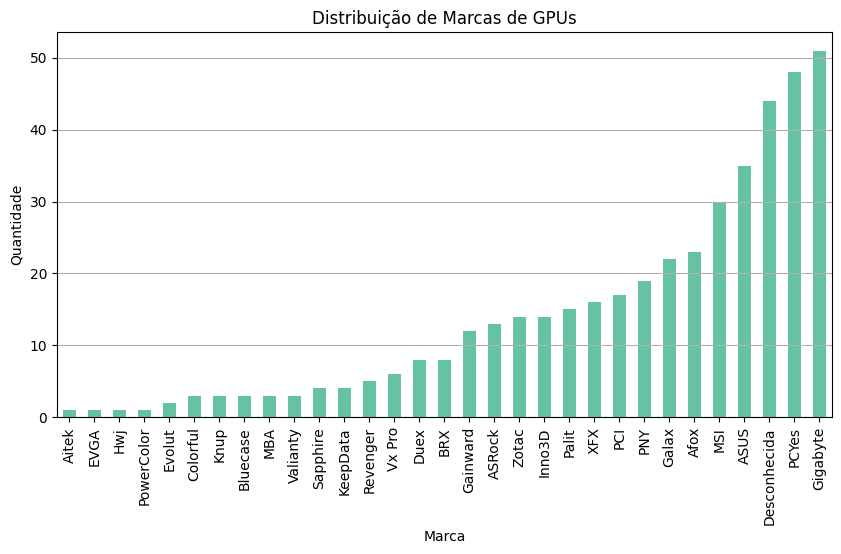

marca
Aitek            1
EVGA             1
Hwj              1
PowerColor       1
Evolut           2
Colorful         3
Knup             3
Bluecase         3
MBA              3
Valianty         3
Sapphire         4
KeepData         4
Revenger         5
Vx Pro           6
Duex             8
BRX              8
Gainward        12
ASRock          13
Zotac           14
Inno3D          14
Palit           15
XFX             16
PCI             17
PNY             19
Galax           22
Afox            23
MSI             30
ASUS            35
Desconhecida    44
PCYes           48
Gigabyte        51
dtype: int64

In [54]:
# Distribuição por marca
distribuicao_marca = df.groupby('marca').size().sort_values()

distribuicao_marca.plot(kind='bar', figsize=(10,5), colormap='Set2')

plt.title("Distribuição de Marcas de GPUs")
plt.xlabel("Marca")
plt.ylabel("Quantidade")
plt.grid(axis='y')
plt.show()

display(distribuicao_marca)


frete_gratis
Pago      259
Grátis    170
dtype: int64

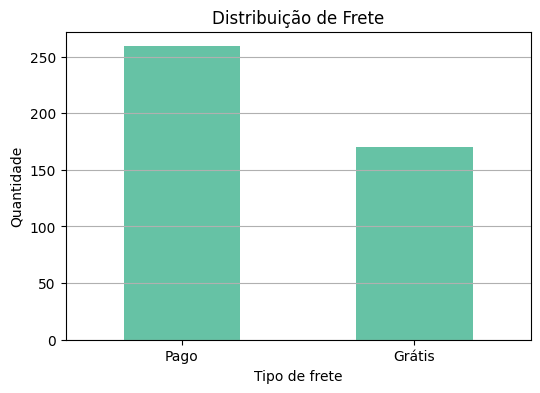

In [91]:
# Distribuição por FRETE GRATÍS
distribuicao_frete = df.groupby('frete_gratis').size()
distribuicao_frete.index = distribuicao_frete.index.map({True: 'Grátis', False: 'Pago'})

display(distribuicao_frete)

distribuicao_frete.plot(kind='bar', figsize=(6,4), colormap='Set2')

plt.title("Distribuição de Frete")
plt.xlabel("Tipo de frete")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

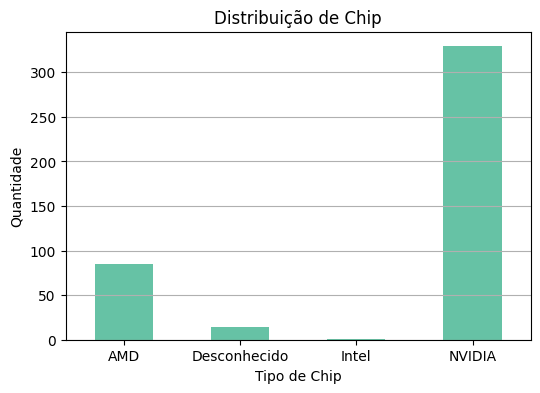

In [57]:
# Distribuição por CHIP 
distribuicao_chip = df.groupby('chip').size()
distribuicao_chip.plot(kind='bar', figsize=(6,4), colormap='Set2')
plt.title("Distribuição de Chip")
plt.xlabel("Tipo de Chip")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Text(0.5, 1.0, 'Média de Preço por Chip')

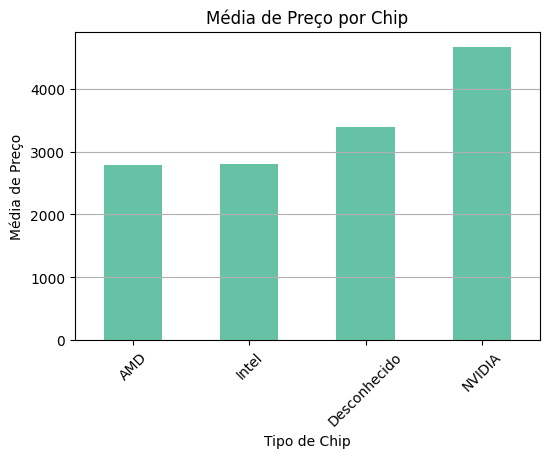

In [93]:
# Média de preço por chip
media_preco_chip = df.groupby('chip')['preco'].mean().sort_values()

media_preco_chip.plot(kind='bar', figsize=(6,4), colormap='Set2')
plt.grid(axis='y')
plt.xlabel('Tipo de Chip')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45)
plt.title('Média de Preço por Chip')

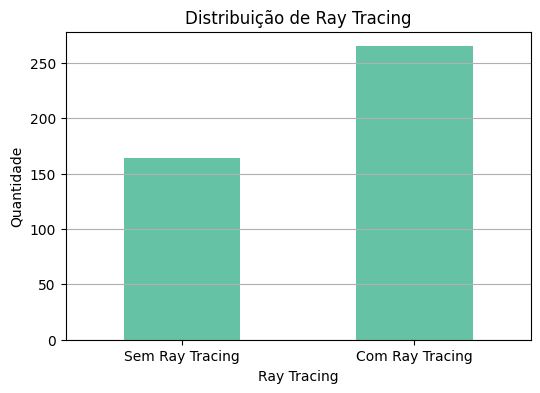

In [76]:
# Distribuição por Ray Tracing
distribuicao_ray_tracing = df.groupby('ray_tracing').size()
distribuicao_ray_tracing.index = distribuicao_ray_tracing.index.map({True: 'Com Ray Tracing', False: 'Sem Ray Tracing'})

distribuicao_ray_tracing.plot(kind='bar', figsize=(6,4), colormap='Set2')

plt.title("Distribuição de Ray Tracing")
plt.xlabel("Ray Tracing")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

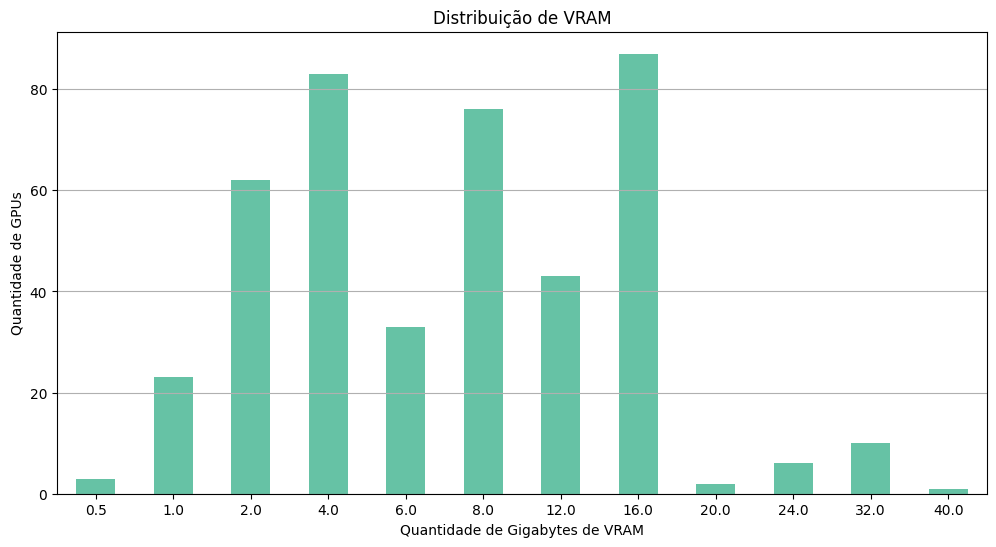

In [75]:
# Distribuição de VRAM

distribuicao_vram = df.groupby('memoria_gb').size().sort_index()

distribuicao_vram.plot(kind='bar', figsize=(12,6), colormap='Set2')

plt.title("Distribuição de VRAM")
plt.xlabel("Quantidade de Gigabytes de VRAM")
plt.ylabel("Quantidade de GPUs")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [98]:
# media de preço
media_preco = df['preco'].mean()
print(f'Média de preço geral das GPUs: R$ {media_preco:.2F}')

# placa mais barata e mais cara
placa_mais_barata = df.loc[df['preco'].idxmin()]
placa_mais_cara = df.loc[df['preco'].idxmax()]

print(f'\nPlaca mais barata: {placa_mais_barata["nome"]} \nPreço: R$ {placa_mais_barata["preco"]:.2f}')
print(f'Placa mais cara: {placa_mais_cara["nome"]} \nPreço: R$ {placa_mais_cara["preco"]:.2f}\n')

# media de VRAM
media_vram = df['memoria_gb'].mean()
print(f'Média de VRAM das GPUs em geral: {media_vram}')

Média de preço geral das GPUs: R$ 4251.87

Placa mais barata: Vx Pro Geforce G210 512mb Ddr3 64 Bits G210lp-512md3 HDMI/vga/dvi 
Preço: R$ 106.00
Placa mais cara: Quadro A800 PNY Nvidia, 40GB HBM2, 5120bits - VCNA800-PB 
Preço: R$ 69999.99

Média de VRAM das GPUs em geral: 8.714452214452214


marca
Aitek             130.990000
EVGA              327.000000
Evolut            398.905000
Knup              427.483333
KeepData          440.940000
Revenger          450.384000
Vx Pro            452.330000
PowerColor        482.550000
Duex              485.125000
Valianty          510.633333
PCI               527.358235
Afox              674.283913
Bluecase          780.660000
Hwj               820.900000
PCYes             877.415208
BRX               981.328750
Desconhecida     1357.758409
Colorful         1365.996667
ASRock           2828.216923
Inno3D           4179.275000
Galax            4365.853636
XFX              4842.428125
Sapphire         5074.990000
ASUS             5608.152571
Gainward         5698.365000
Zotac            5916.230000
MSI              7891.001667
Palit            7929.439333
Gigabyte         8154.834118
PNY             11600.235789
MBA             12959.100000
Name: preco, dtype: float64

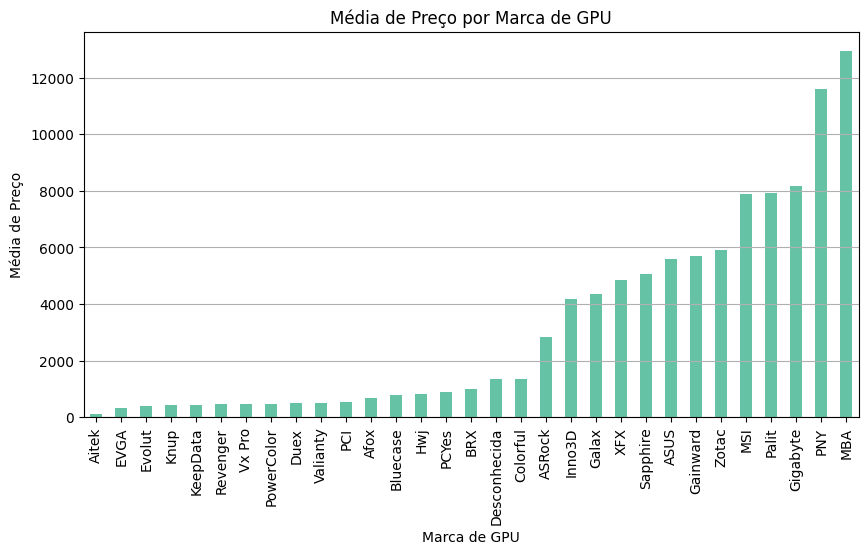

In [99]:
# media de preço por marca
media_preco_marca = df.groupby('marca')['preco'].mean().sort_values()
media_preco_marca.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.grid(axis='y')
plt.title('Média de Preço por Marca de GPU')
plt.xlabel('Marca de GPU')
plt.ylabel('Média de Preço')

display(media_preco_marca)

marca
Aitek            1.000000
EVGA             1.000000
Knup             1.666667
Vx Pro           1.916667
Duex             2.312500
KeepData         2.500000
Afox             2.608696
Revenger         2.800000
PCI              3.323529
Valianty         3.333333
Evolut           4.000000
PowerColor       4.000000
PCYes            4.041667
Desconhecida     4.840909
Colorful         5.333333
Bluecase         5.333333
BRX              6.750000
Hwj              8.000000
Inno3D           9.142857
Galax            9.181818
ASRock          10.000000
Gainward        10.000000
ASUS            10.685714
Zotac           11.571429
PNY             12.842105
MSI             13.000000
Palit           13.466667
Gigabyte        14.156863
XFX             14.500000
Sapphire        17.000000
MBA             21.333333
Name: memoria_gb, dtype: float64

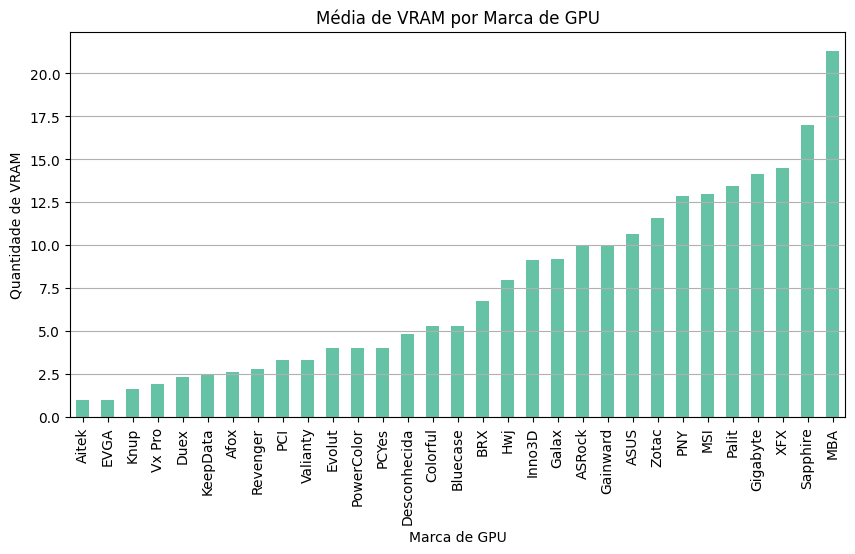

In [100]:
# media de VRAM por marca
media_vram_marca = df.groupby('marca')['memoria_gb'].mean().sort_values()
media_vram_marca.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.grid(axis='y')
plt.title('Média de VRAM por Marca de GPU')
plt.xlabel('Marca de GPU')
plt.ylabel('Quantidade de VRAM')

display(media_vram_marca)

# relacao de preco por VRAM

# Resultados da análise


### Análise (Distribuição por Marca):

As 3 principais marcas de GPUs na Kabum são: 

    1. Gigabyte (51 unidades)
    2. PCYes (48 unidades)
    3. ASUS (35 unidades)

Porém, existem diversas GPUs classificadas como 'Desconhecida (44 unidades)',
    devido a irregularidade na forma de anunciar a marca da Placa, por parte dos vendedores


### Frete

A maior parte (por 89 itens) tem Frete pago, \
    Podendo aumentar substancialmente o preço da GPU, \
    A depender do local de entrega em relação ao vendendor


### Tipo de Chip

A maior parte das GPUs anunciadas na Kabum possuem chips da NVIDIA \
Sendo também da NVIDIA, a média de preço mais elevada


### Ray Tracing

A maior parte das placas mais modernos anunciadas na Kabum \
Já possuem a funcionalidade de Ray Tracing implementada


### VRAM

MAIS FREQUENTES:

As quantidades de memória de vídeo mais frequentes são:
1. 4gb
2. 8gb
3. 16gb

Que são os padrões de mercado, \
Placas com menos VRAM são placas mais antigas \
Placas com mais são geralmente para uso em servidores ou centrais de processamento


### Média de preço
Média de preço geral das GPUs: R$ 4251.87

Placa mais barata: Vx Pro Geforce G210 512mb Ddr3 64 Bits G210lp-512md3 HDMI/vga/dvi \
Preço: R$ 106.00

Placa mais cara: Quadro A800 PNY Nvidia, 40GB HBM2, 5120bits - VCNA800-PB \
Preço: R$ 69999.99


### 3 Marcas com média de Preço mais elevado

1. MBA (R$ 12959,10)
2. PNY (R$ 11600,23)
3. Gigabyte (R$ 8154,83)

MBA e PNY são marcas de nicho com enfasê em placas de alto nível, \
Já a Gigabyte é uma marca mais voltada ao consumidor, com variados níveis de GPU


### 3 Marcas com média de VRAM mais elevada

1. MBA
2. Saphpire
3. XFX